# Seaborn

seaborn 的绘图函数分为两个层次，**figure-level** 和 **axes-level**，以下按照EDA的目的来分别介绍。

seaborn的绘图函数里，公用的一些参数含义如下：

+ `data`: DataFrame
Tidy (**long-form**) dataframe where each column is a variable and each row is an observation.

+ `hue`: name in data, optional
Grouping variable that will produce elements with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

+ `size`: name in data, optional
Grouping variable that will produce elements with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.

+ `style`: name in data, optional
Grouping variable that will produce elements with different styles.  Can have a numeric dtype but will always be treated as categorical.

+ `row, col`: names of variables in data, optional
Categorical variables that will determine the faceting of the grid.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# styles的选择["white", "dark", "whitegrid", "darkgrid", "ticks"]
sns.set(style="darkgrid")

In [6]:
tips = sns.load_dataset("tips")
# type(tips)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


## 1. Visualizing statistical relationships

顶层绘图函数：`relplot([x, y, hue, size, style, data, row, …])` **Figure-level** interface for drawing relational plots onto a FacetGrid.
+ `scatterplot([x, y, hue, style, size, data, …])`  
Draw a scatter plot with possibility of several semantic groupings，(`kind="scatter"`，默认)
+ `lineplot([x, y, hue, size, style, data, …])`  
Draw a line plot with possibility of several semantic groupings，(`kind=line`)

使用方式类似于ggplot

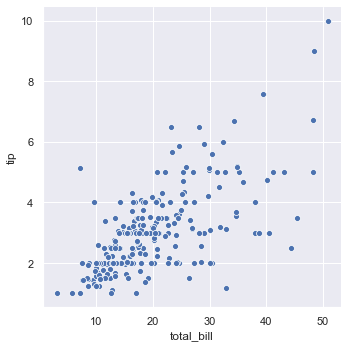

In [8]:
sns.relplot(data=tips, x='total_bill', y='tip')

采用`hue`参数映射点的颜色

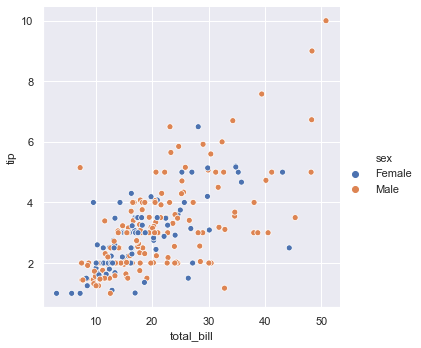

In [9]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='sex')

`style`参数映射点的形状

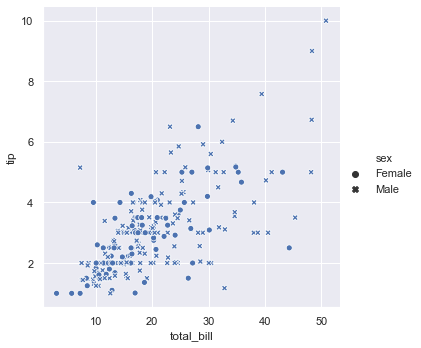

In [12]:
sns.relplot(data=tips, x='total_bill', y='tip', style='sex')

`size`参数映射点的大小

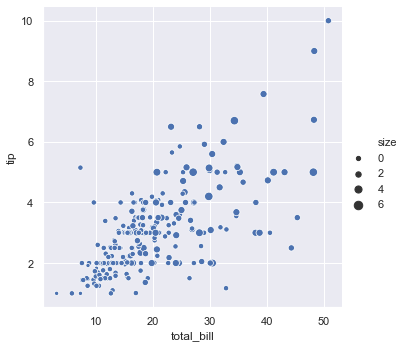

In [14]:
sns.relplot(data=tips, x='total_bill', y='tip', size='size')

`row`,`col`参数映射用于分面的变量

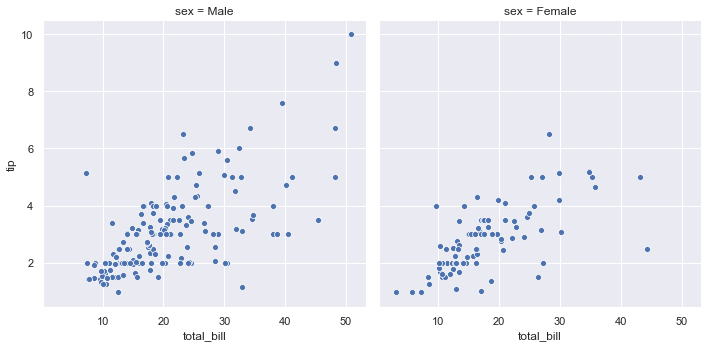

In [15]:
sns.relplot(data=tips, x='total_bill', y='tip', col='sex')

绘制线图  
**对于line来说，如果data中同一个x对应多个y值，会自动绘制均值的折线图，并绘制95%的置信区间。**

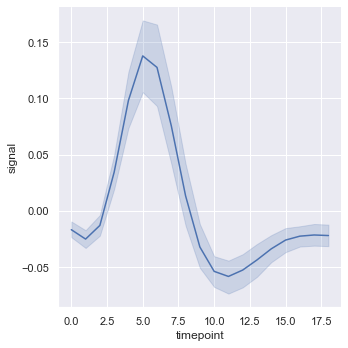

In [18]:
sns.relplot(data=fmri, x='timepoint', y='signal', kind='line')

分组绘制线

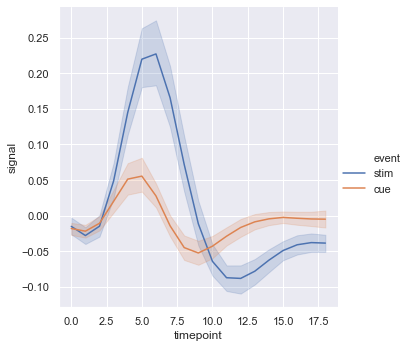

In [19]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue = 'event',kind='line')

## 2. Categorical plots

用于绘制分类变量之间的关系，只要有一个变量是分类变量即可。

顶层绘图函数：  
`catplot([x, y, hue, data, row, col, …])` **Figure-level** interface for drawing categorical plots onto a FacetGrid.  
这之下又分为三类：

### 2.1 Categorical **scatterplots** -- 点状图

+ `stripplot([x, y, hue, data, order, …])` Draw a scatterplot where one variable is categorical，(`kind=strip`，默认)

+ `swarmplot([x, y, hue, data, order, …])` Draw a categorical scatterplot with non-overlapping points，(`kind=swarm`)

In [20]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


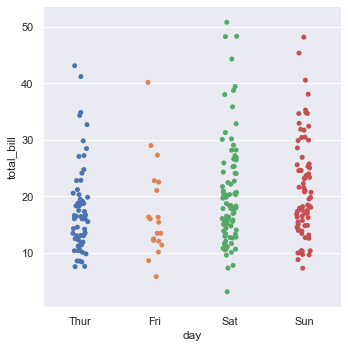

In [22]:
sns.catplot(data=tips, x='day', y='total_bill')

`jitter`参数控制点左右的分散程度

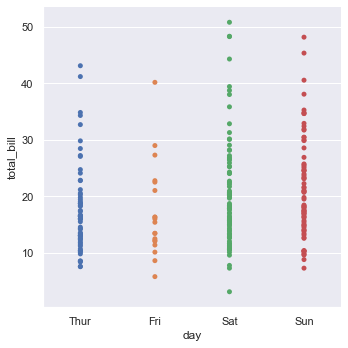

In [23]:
sns.catplot(data=tips, x='day', y='total_bill', jitter=False)

绘制swarm的图

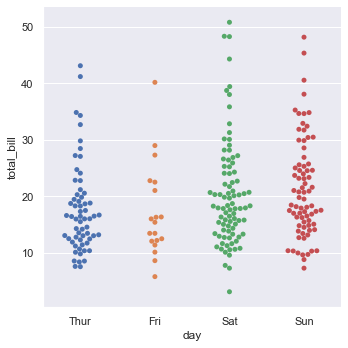

In [24]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

可以交换横纵轴

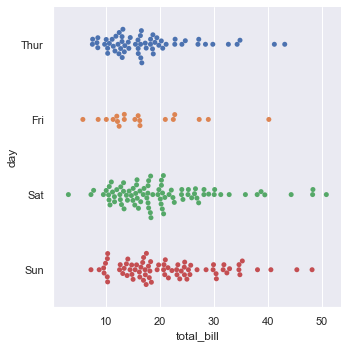

In [25]:
sns.catplot(y="day", x="total_bill", kind="swarm", data=tips)

### 2.2 Categorical **distribution** plots -- 分布图

+ `boxplot([x, y, hue, data, order, hue_order, …])` Draw a box plot to show distributions with respect to categories，(`kind=box`)

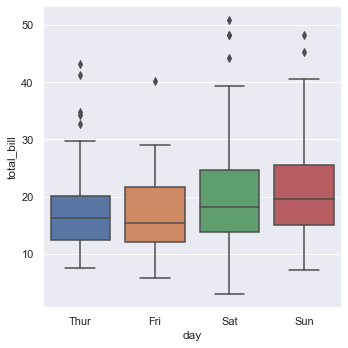

In [26]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

增加一个`hue`参数

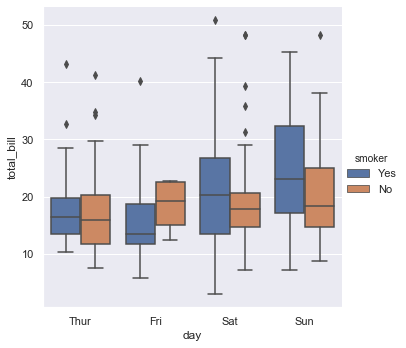

In [28]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

+ `boxenplot([x, y, hue, data, order, …])` Draw an enhanced box plot for larger datasets，(`kind=boxen`)

还可以绘制更为精细的多阶箱线图, 只要设置`kind = boxen`

In [29]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


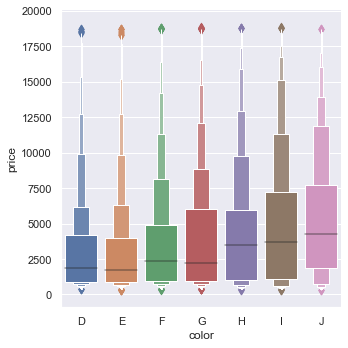

In [30]:
sns.catplot(x="color", y="price", kind="boxen", data=diamonds.sort_values("color"))

+ `violinplot([x, y, hue, data, order, …])` Draw a combination of boxplot and kernel density estimate，(`kind=violin`)

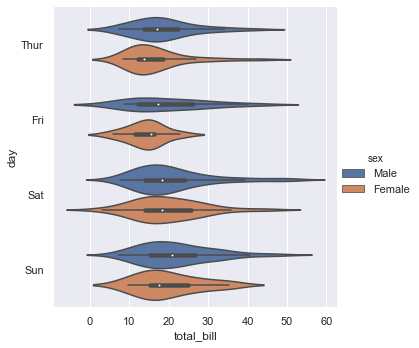

In [32]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", data=tips)

### 2.3 Categorical **estimate** plots -- 估计图

+ `barplot([x, y, hue, data, order, hue_order, …])` Show point estimates and confidence intervals as rectangular bars，(`kind=bar`)

In [33]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


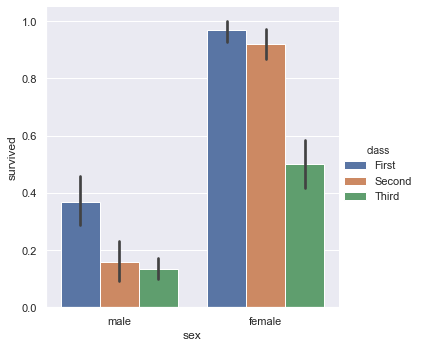

In [34]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

+ `countplot([x, y, hue, data, order, …])` Show the counts of observations in each categorical bin using bars，(`kind=count`)

这个是条形图的特殊情况，只统计某个变量里取值的频数

In [39]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

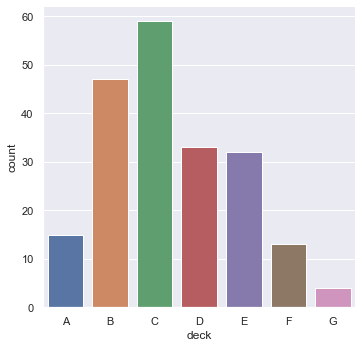

In [36]:
sns.catplot(x="deck", kind="count", data=titanic)

+ `pointplot([x, y, hue, data, order, …])` Show point estimates and confidence intervals using scatter plot glyphs，(`kind=point`)

## 3. Visualizing the distribution of a dataset

用于可视化数据集的分布，这部分的绘图函数最适合做EDA。

### 3.1 单变量分布

`distplot(a[, bins, hist, kde, rug, fit, …])` Flexibly plot a **univariate** distribution of observations.  
  用于绘制**单变量**的分布，常见的参数有：
  + `a`: Series, 1d-array, or list.Observed data. 
  If this is a Series object with a name attribute, the name will be used to label the data axis.
  + `bins`:argument for matplotlib hist(), or None, optional
  Specification of hist bins. If unspecified, as reference rule is used that tries to find a useful default.
  + `hist`:bool, optional
  Whether to plot a (normed) histogram.
  + `kde`:bool, optional
  Whether to plot a gaussian kernel density estimate.
  + `rug`:bool, optional
  Whether to draw a rugplot on the support axis.

默认情况下，`distplot`会绘制变量的**直方图**以及**核密度图**。

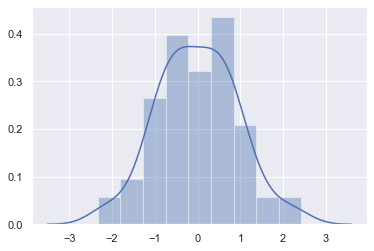

In [40]:
x = np.random.normal(size=100)
sns.distplot(x)

可以使用`kde=False`来绘制单纯的直方图。  
下图中，打开了`rug`参数，坐标轴附件的竖线就是所谓的Rug图——它也可以使用`rugplot()`函数单独绘制

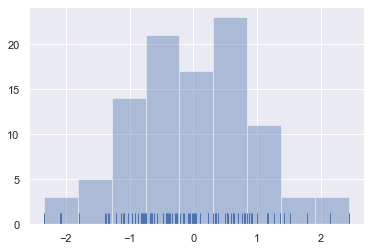

In [41]:
sns.distplot(x, kde=False, rug=True)

绘制直方图时指定bins

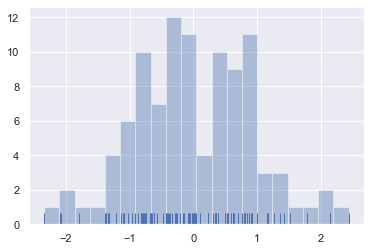

In [42]:
sns.distplot(x, kde=False, rug=True, bins=20)

绘制核密度图，只要关闭`hist`参数就行

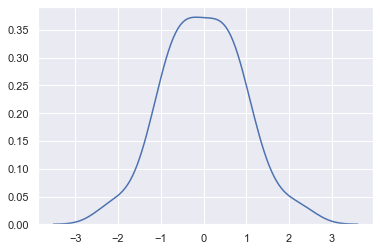

In [44]:
sns.distplot(x, kde=True, hist=False)

上面也可以直接使用`kdeplot`绘制。  
直接使用`kdeplot`的话，可以提供更加精细的控制。

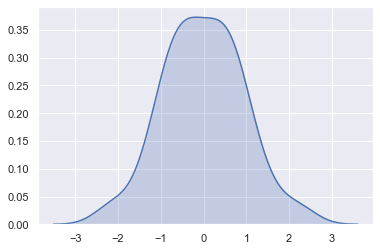

In [47]:
sns.kdeplot(x, shade=True)

### 3.2 二元变量的分布

`jointplot(x, y[, data, kind, stat_func, …])` Draw a plot of two variables with **bivariate** and **univariate** graphs.

常用参数有：
+ `x, y`:strings or vectors
Data or names of variables in data.
+ `data`:DataFrame, optional
DataFrame when x and y are variable names.
+ `kind`:{ “scatter” | “reg” | “resid” | “kde” | “hex” }, optional
Kind of plot to draw.

+ `stat_fun`:ccallable or None, optional
Deprecated

+ `color`:matplotlib color, optional
Color used for the plot elements.

In [50]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

`jointplot`默认下会绘制`kind=scatter`类型的图——此时调用了`scatterplot()`函数。

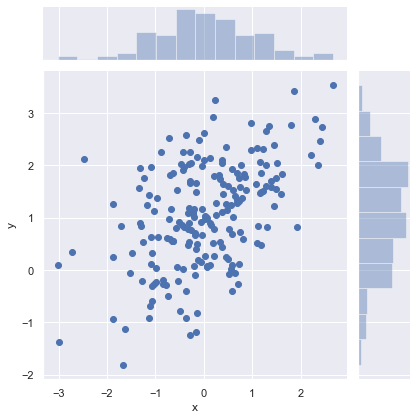

In [53]:
sns.jointplot(x="x", y="y", data=df)

绘制两变量的联合核密度图

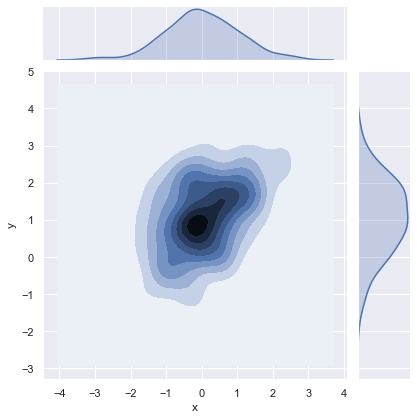

In [54]:
sns.jointplot(x="x", y="y", data=df, kind='kde')

也可以调用`kdeplot`函数来绘制

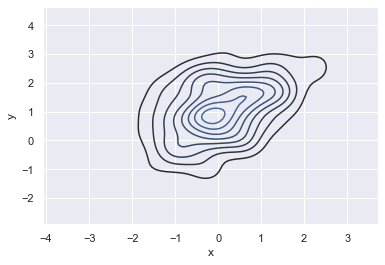

In [55]:
sns.kdeplot(df.x, df.y)

### 3.3 探索数据集中成对变量间的关系

`pairplot(data[, hue, hue_order, palette, …])` Plot **pairwise relationships** in a dataset.

In [56]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


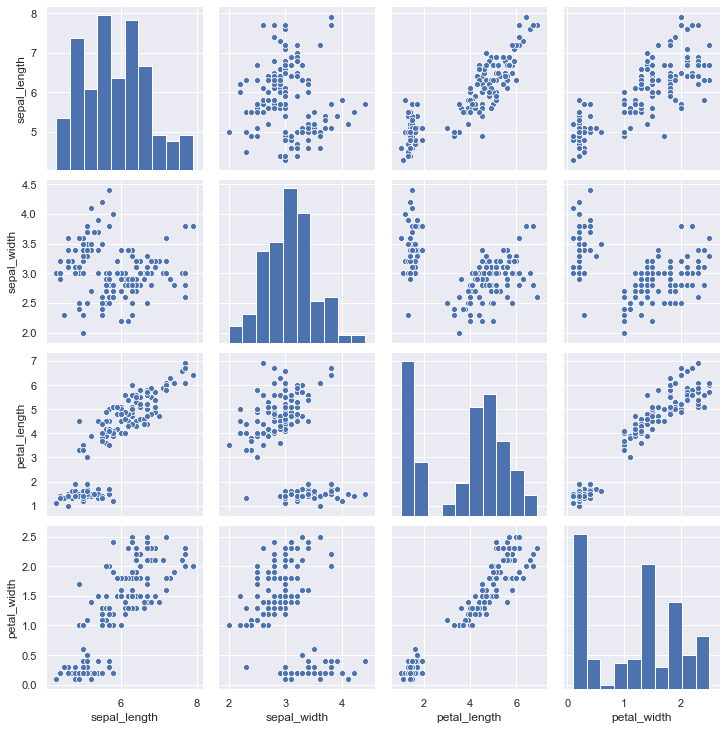

In [57]:
sns.pairplot(iris)

指定分割变量`hue`，直接绘制iris中三种类型的花瓣的变量间的关系

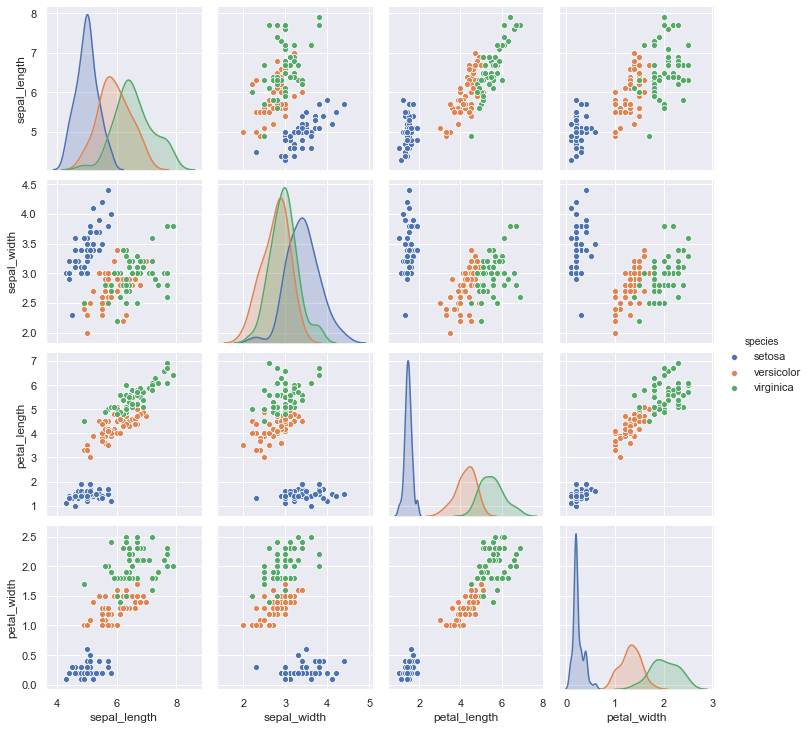

In [58]:
sns.pairplot(iris, hue="species")

### 3.4 其他

下面的这两个函数可以单独使用，但是它们已经被包含在上面那几个函数的参数中了。

+ `kdeplot(data[, data2, shade, vertical, …])` Fit and plot a **univariate** or **bivariate** kernel density estimate.

+ `rugplot(a[, height, axis, ax])` Plot datapoints in an array as sticks on an axis.

## 4. Visualizing linear relationships

+ `regplot(x, y[, data, x_estimator, x_bins, …])` Plot data and a linear regression model fit.
+ `lmplot(x, y, data[, hue, col, row, palette, …])` Plot data and regression model fits across a FacetGrid.
+ `residplot(x, y[, data, lowess, x_partial, …])` Plot the residuals of a linear regression.

**`lmplot()`比`regplot()`的功能更多，它能根据分组变量绘制多条回归线。**实际上，`lmplot()`是对`regplot()`和`FacetGrid`进行了封装，这也意味着`regplot()`是一个**axes-level**的绘图API。

## 5. 其他有用的绘图函数

### 5.1 热力图

`headmap(data, vmin=None, vmax=None, cmap=None, center=None,...)`

In [65]:
uniform_data = pd.DataFrame(np.random.rand(4, 5))

In [66]:
uniform_data

,0,1,2,3,4
0,0.520713,0.534483,0.585389,0.036005,0.183887
1,0.047489,0.261476,0.167109,0.093047,0.363081
2,0.111175,0.680854,0.274436,0.018009,0.571864
3,0.568148,0.421419,0.841750,0.971563,0.829060


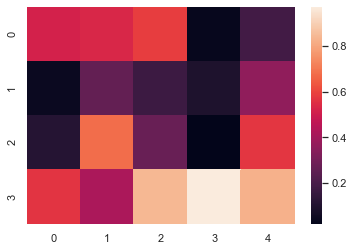

In [67]:
sns.heatmap(uniform_data)